# STEP 2a: EDA (a)

### I am using pandas to evaluate my data easily and efficiently, matplotlib and seaborn to plot my graphs.

#### I have tried to look at the percentage of which posts and generally what kind of data they hold.
1. I looked at whether a particular attribute for a data was empty or not (Using a HeatMap)
2. I Looked at the number and length of comments, titles flair wise. Using Bar-Graphs.

The rationale behind this was to analyse the data and understand the usefulness of data that I have.
The thought was:
(Lesser the null values of the data, longer the length of titles, comments, bodies, higher the number of comments, better the data)

In [1]:
#Importing the necessary libraries (for graphs...)
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
# Importing .csv exported from rethinkDB as a DataFrame
df = pd.read_csv('SubReddit.csv',sep=',')


###  The head(), shape, info() command provides just an overview of the data and helps me verify if the data got imported correctly

In [3]:
# Checking if dataframe correctly imported, viewing first 5 entries
df.head()


,title,url,no_comm,body,comment,flair
0,"[""airtel"", ""trying"", ""to"", ""cash"", ""in"", ""on"",...",https://i.redd.it/hsd8l85haxr31.jpg,67,NaN,"[""i"", ""know"", ""people"", ""like"", ""to"", ""give"", ...",Unverified
1,"[""what"", ""the"", ""world"", ""can"", ""learn"", ""from...",https://www.technologyreview.com/2020/04/13/99...,0,NaN,NaN,Coronavirus
2,"[""how"", ""china"", ""dominates"", ""tech"", ""investm...",https://www.thehindubusinessline.com/info-tech...,4,NaN,"[""a"", ""recent"", ""indian"", ""institute"", ""of"", ""...",Policy/Economy
3,"[""skill"", ""up"", ""udemy"", ""courses"", ""are"", ""on...",https://www.reddit.com/r/india/comments/g1vbup...,61,"[""note"", ""this"", ""is"", ""not"", ""a"", ""promotion""...","[""tbh"", ""udemy"", ""discount"", ""sales"", ""happens...",Science/Technology
4,"[""spotify"", ""users"", ""in"", ""india"", ""can"", ""fi...",https://www.androidcentral.com/spotify-users-i...,107,NaN,"[""so"", ""is"", ""the"", ""library"", ""comparable"", ""...",Science/Technology


In [4]:
df.shape


(1500, 6)

In [5]:
df.columns.values 

array(['title', 'url', 'no_comm', 'body', 'comment', 'flair'],
      dtype=object)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    1500 non-null   object
 1   url      1500 non-null   object
 2   no_comm  1500 non-null   int64 
 3   body     600 non-null    object
 4   comment  1418 non-null   object
 5   flair    1500 non-null   object
dtypes: int64(1), object(5)
memory usage: 70.4+ KB


In [7]:
df.describe() 

,no_comm
count,1500.000000
mean,200.825333
std,543.217879
min,0.000000
25%,11.750000
50%,39.000000
75%,114.000000
max,8347.000000


In [8]:
df.flair.unique()


array(['Unverified', 'Coronavirus', 'Policy/Economy',
       'Science/Technology', 'Food', 'CAA-NRC', 'AskIndia',
       'Non-Political', 'Photography', 'Sports', 'AMA', 'Scheduled',
       '[R]eddiquette', 'Politics', 'Business/Finance'], dtype=object)

In [9]:
df.title.value_counts()


["late", "night", "random", "discussion", "thread"]                                                                                                                                                                                                                                                  65
["thousands", "of", "litres", "of", "cow", "urine", "consumed", "in", "gujarat", "daily"]                                                                                                                                                                                                             3
["hey", "reddit", "india", "we", "are", "the", "founding", "editors", "of", "the", "wire", "you", "can", "ask", "us", "anything"]                                                                                                                                                                     2
["icmr", "directly", "procured", "faulty", "covid19", "testing", "kits", "from", "chinese", "vendors"]          

In [10]:
df.body.value_counts()


["beep", "boop", "bot", "i", "am", "a", "bot", "if", "any", "problem", "askaway", "my", "creator"]                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      

#### The heatmap very clearly shows that the body of most the posts is empty. From the 1500 posts for which the data is collected 900 posts had no body at all. This could mean that though body can help train the model better, (more text) but because of its inconsistency it might just lead to poorer results.

(<matplotlib.axes._subplots.AxesSubplot at 0x7fbf0b77d250>,)

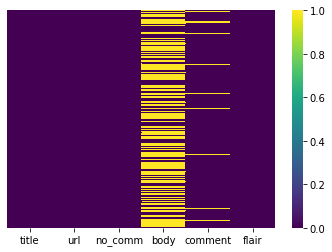

In [11]:
sns.heatmap(df.isnull(),yticklabels=False,cmap="viridis"),


In [12]:
# Following is the list of flairs selected

flairs=["[R]eddiquette","Politics","Non-Political","Business/Finance","Unverified","Science/Technology","Sports","Photography","CAA-NRC","Food","AskIndia","Policy/Economy","Scheduled","AMA","Coronavirus"]

####  We see that the flairs Scheduled, AMA and [R]eddiquete have the highest number of comments in comparison to others. Again this is expected as all of these flairs involve an interaction with different Reddit users. 

<BarContainer object of 15 artists>

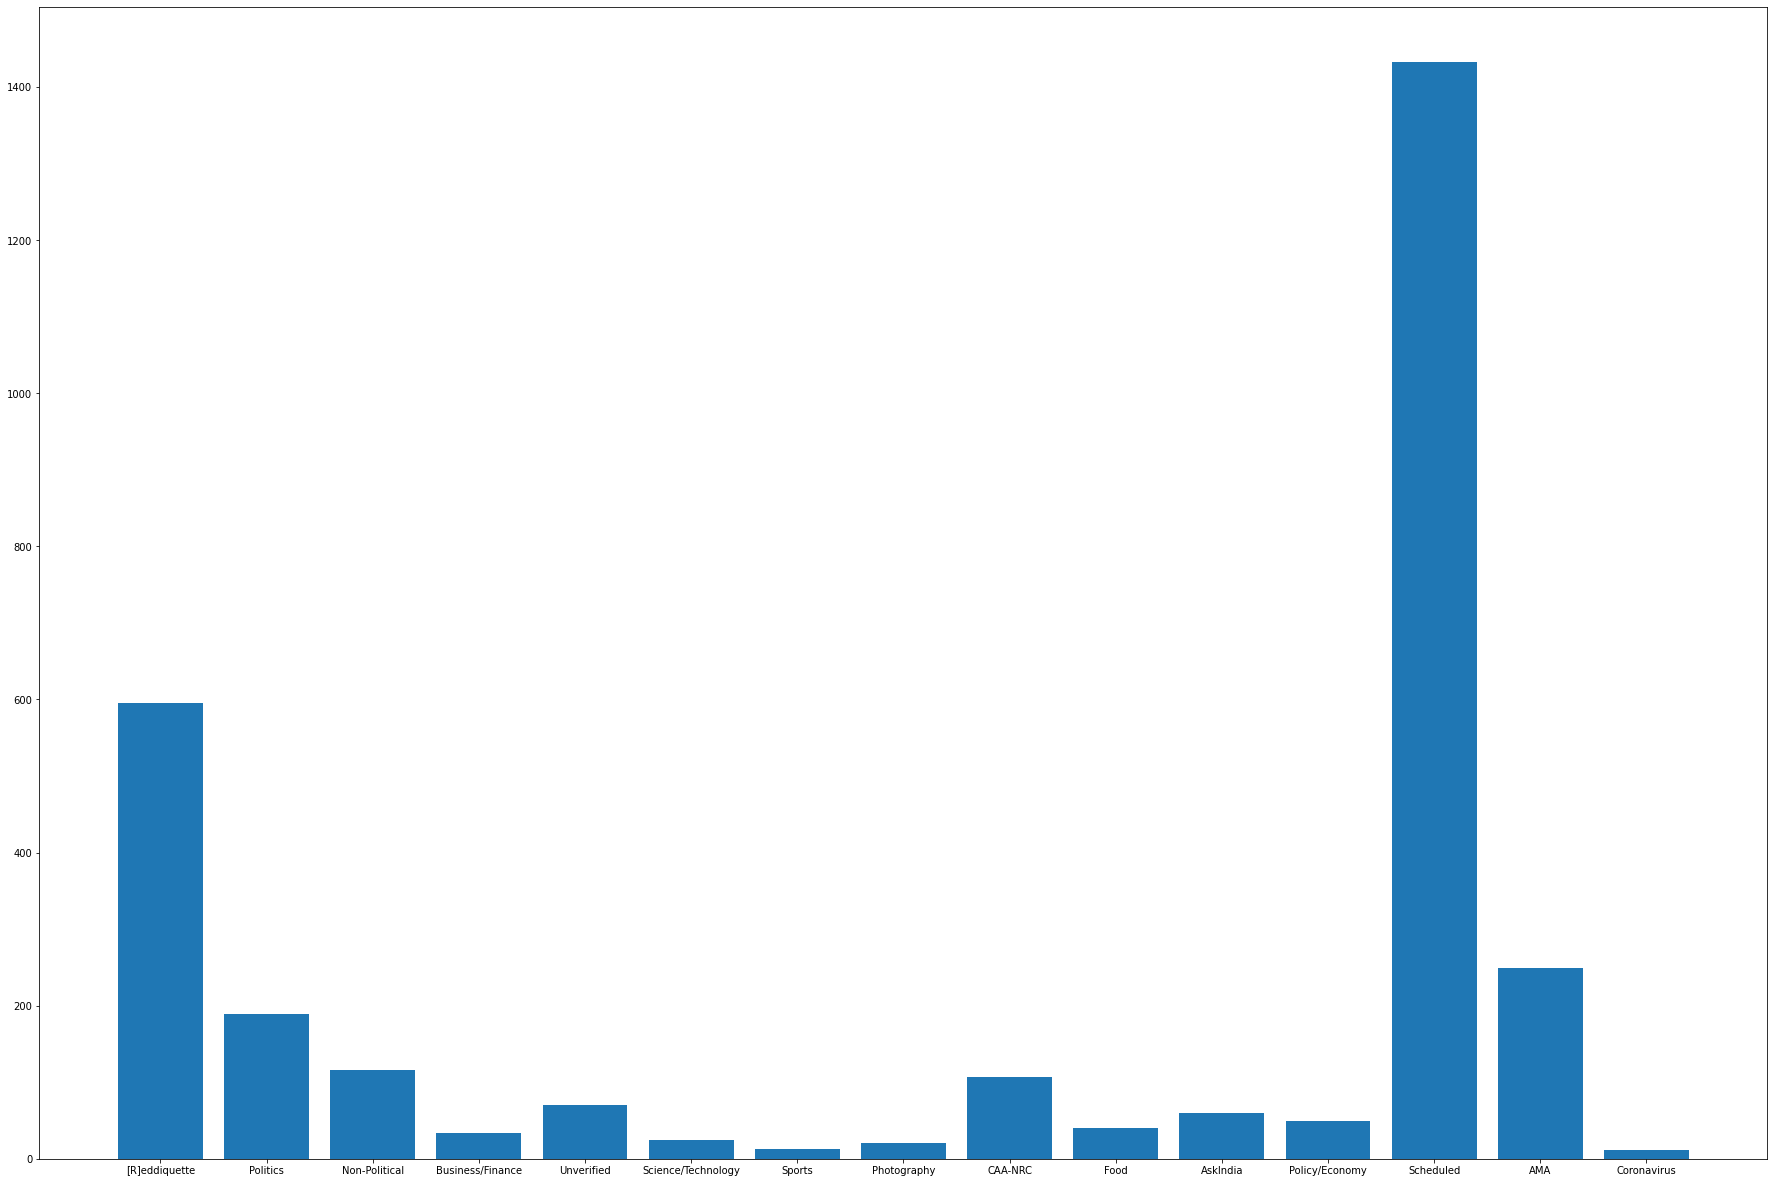

In [13]:
# Bar Graph for Number of Comments Vs Flairs
fig = plt.figure()
ax = fig.add_axes([0,0,4,4])
cnt = [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
i=0
for f in flairs:
    cnt[i] = df.loc[df['flair'] == f, 'no_comm'].sum()
    cnt[i] = cnt[i]/100
    i = i+1 
ax.bar(flairs,cnt)

#### For flairs like Unverified, AMA, and CAA-NRC we have the average length of comments quite higher than the rest. This could result in a higher accuracy of predictions for these flairs. On the other hand for flairs like Sprts, Food the average length is quite low and could result in poorer results

<BarContainer object of 15 artists>

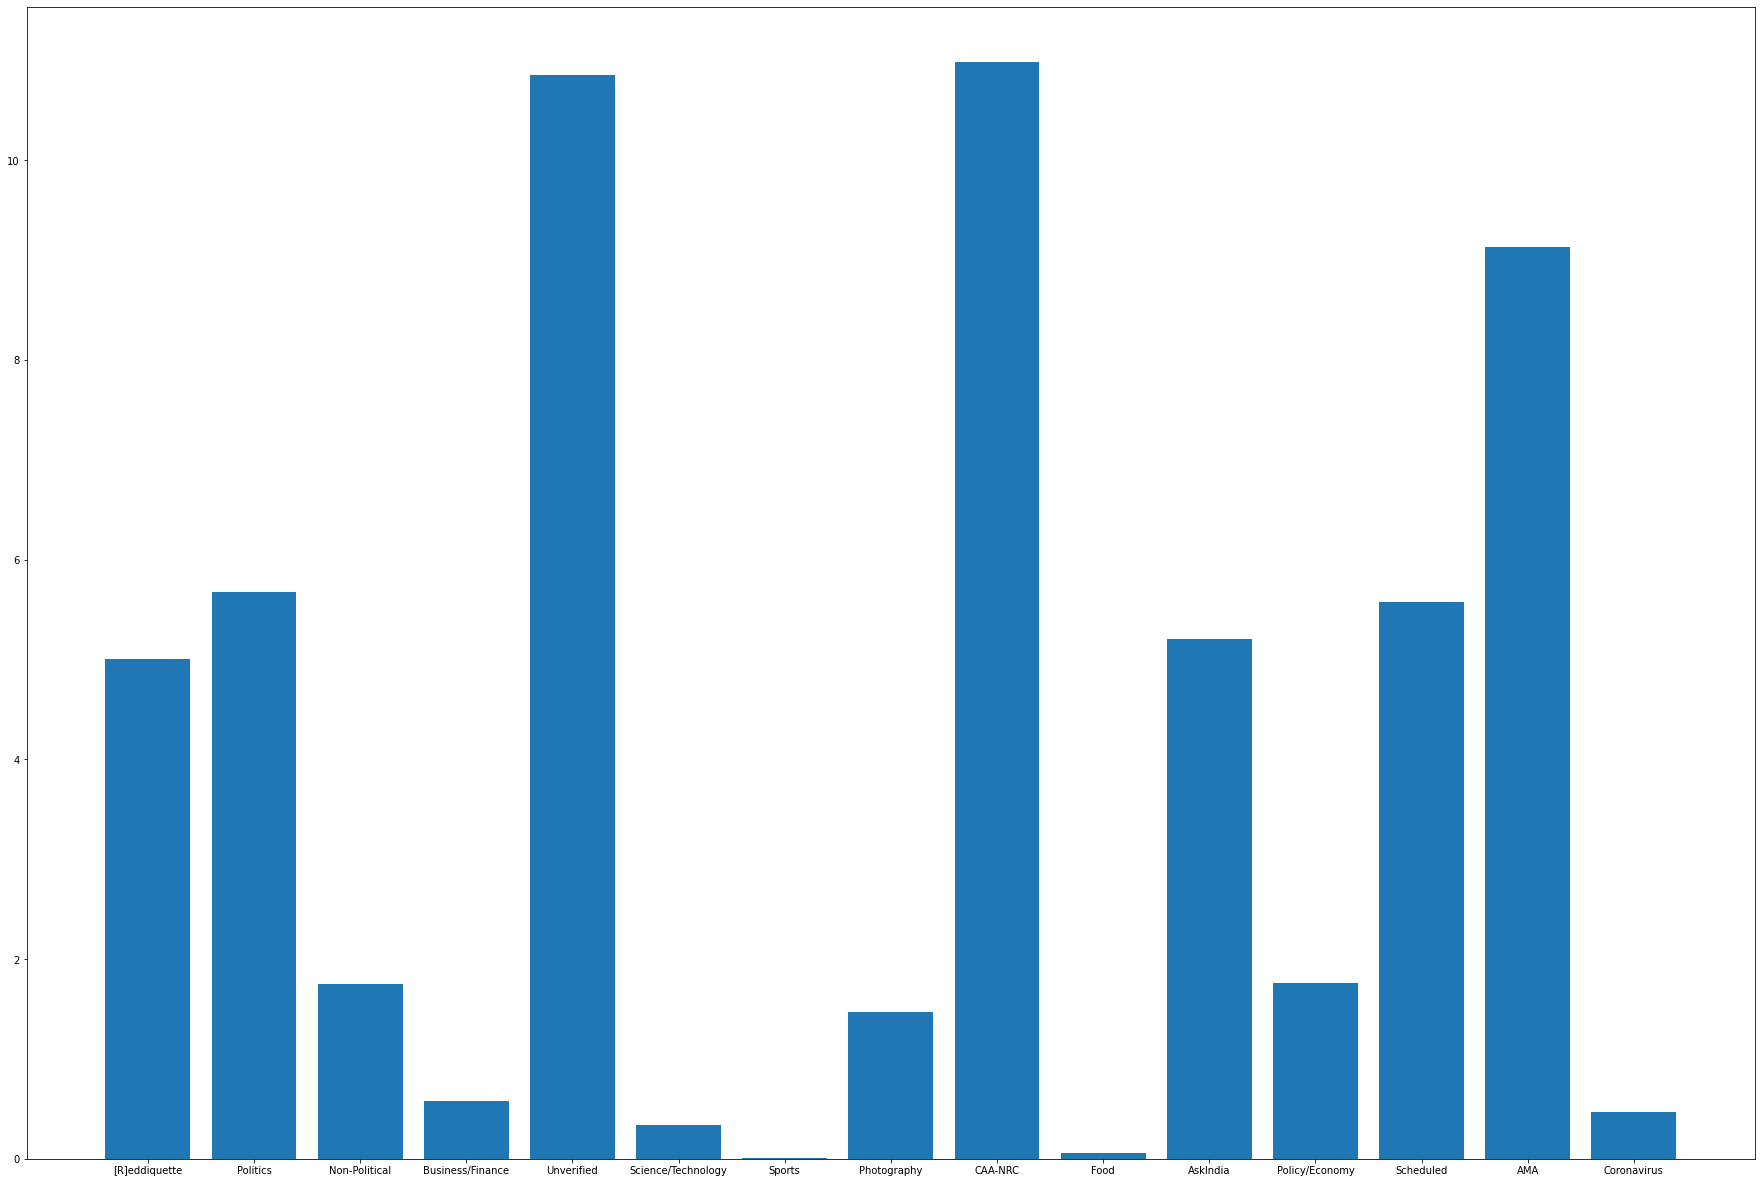

In [14]:
# Bar Graph for Length of Comments Vs Flairs
fig = plt.figure()
ax = fig.add_axes([0,0,4,4])
cnt = [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
i=0
for f in flairs:
    arr = df.loc[df['flair'] == f, 'comment']
    for ele in arr:
        cnt[i] = cnt[i] + len(str(ele).split(','))
        cnt[i] = cnt[i]/100
    i = i+1 
ax.bar(flairs,cnt)

#### The graph here is fairly uniform except for two flairs namely [R]eddiquette, AMA

<BarContainer object of 15 artists>

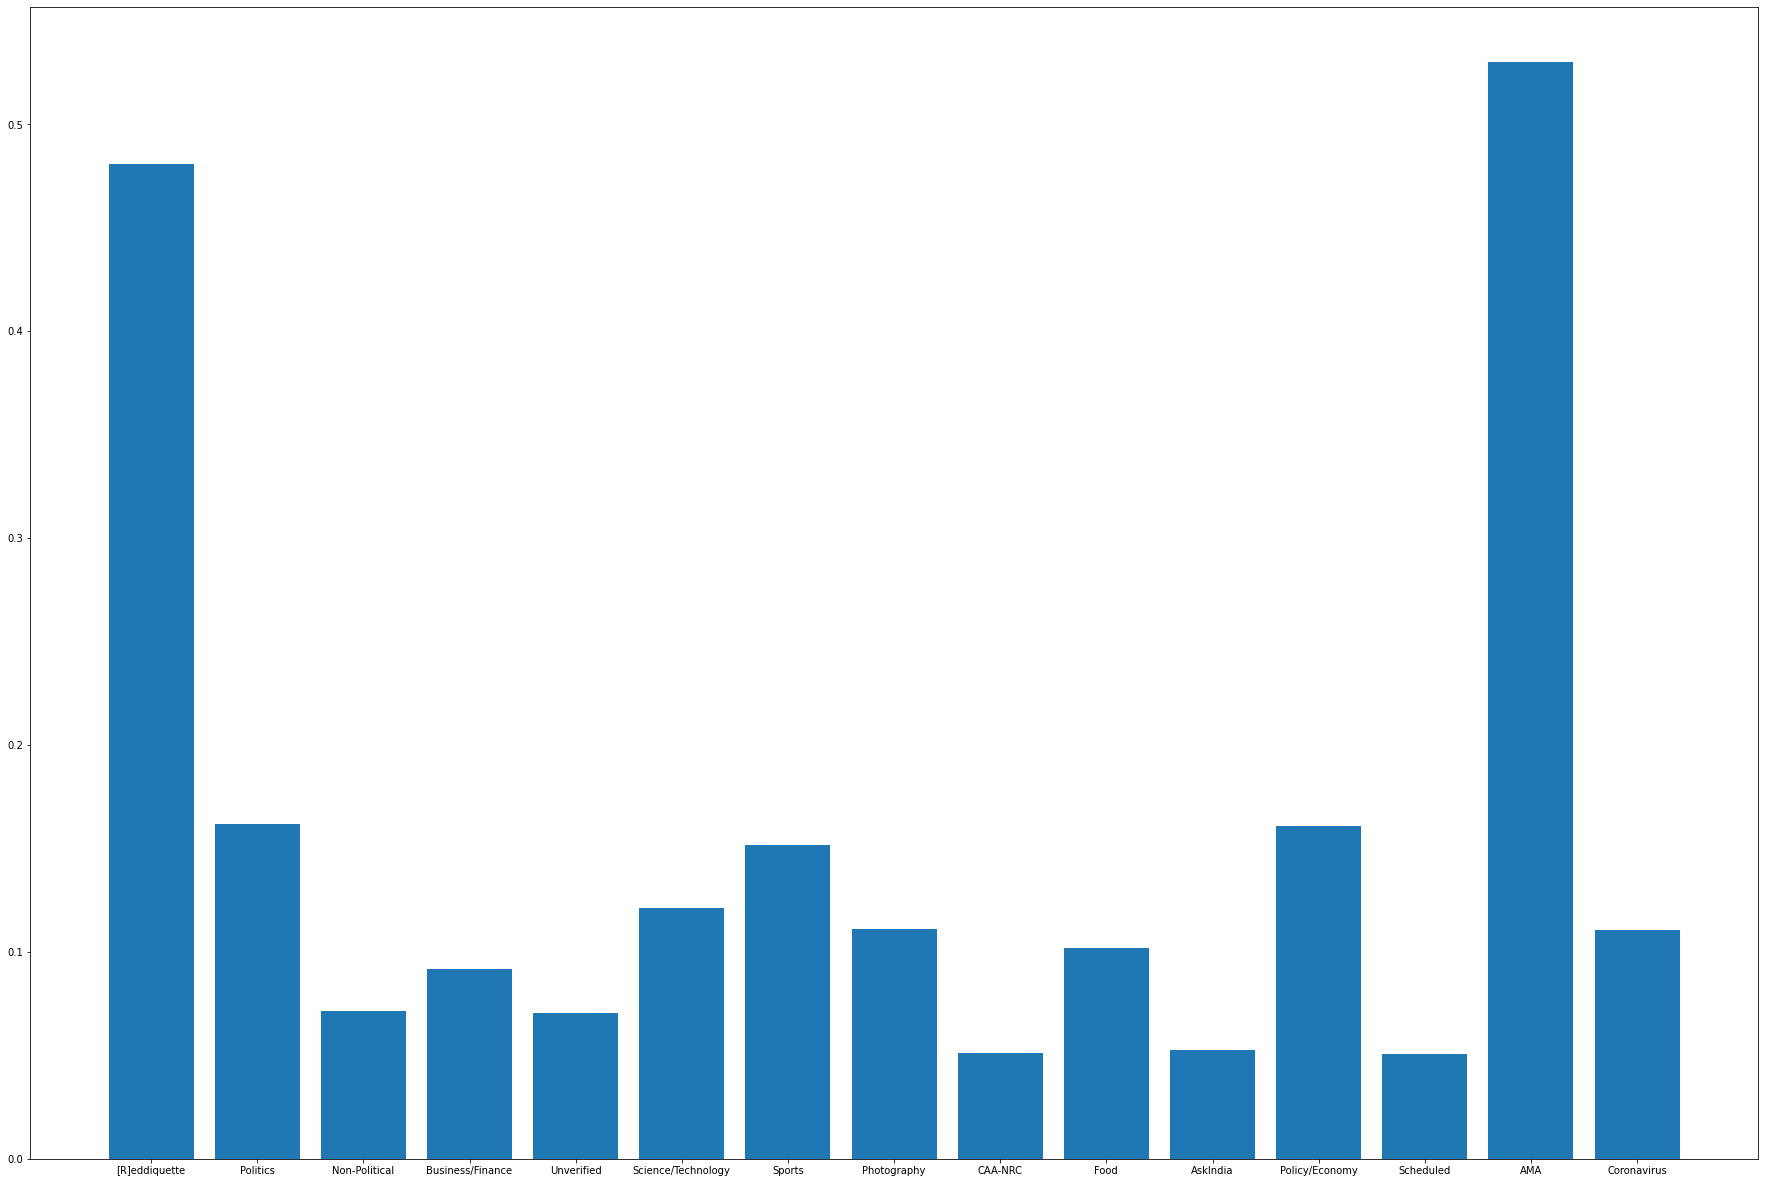

In [15]:
# Bar Graph for Length of Titles Vs Flairs
fig = plt.figure()
ax = fig.add_axes([0,0,4,4])
cnt = [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
i=0
for f in flairs:
    arr = df.loc[df['flair'] == f, 'title']
    for ele in arr:
        cnt[i] = cnt[i] + len(str(ele).split(','))
        cnt[i] = cnt[i]/100
    i = i+1 
ax.bar(flairs,cnt)

##### The body length on average, for the data that is available, the body length of Unverified, CAA-NRC and AMA is quite long than others in comparison

<BarContainer object of 15 artists>

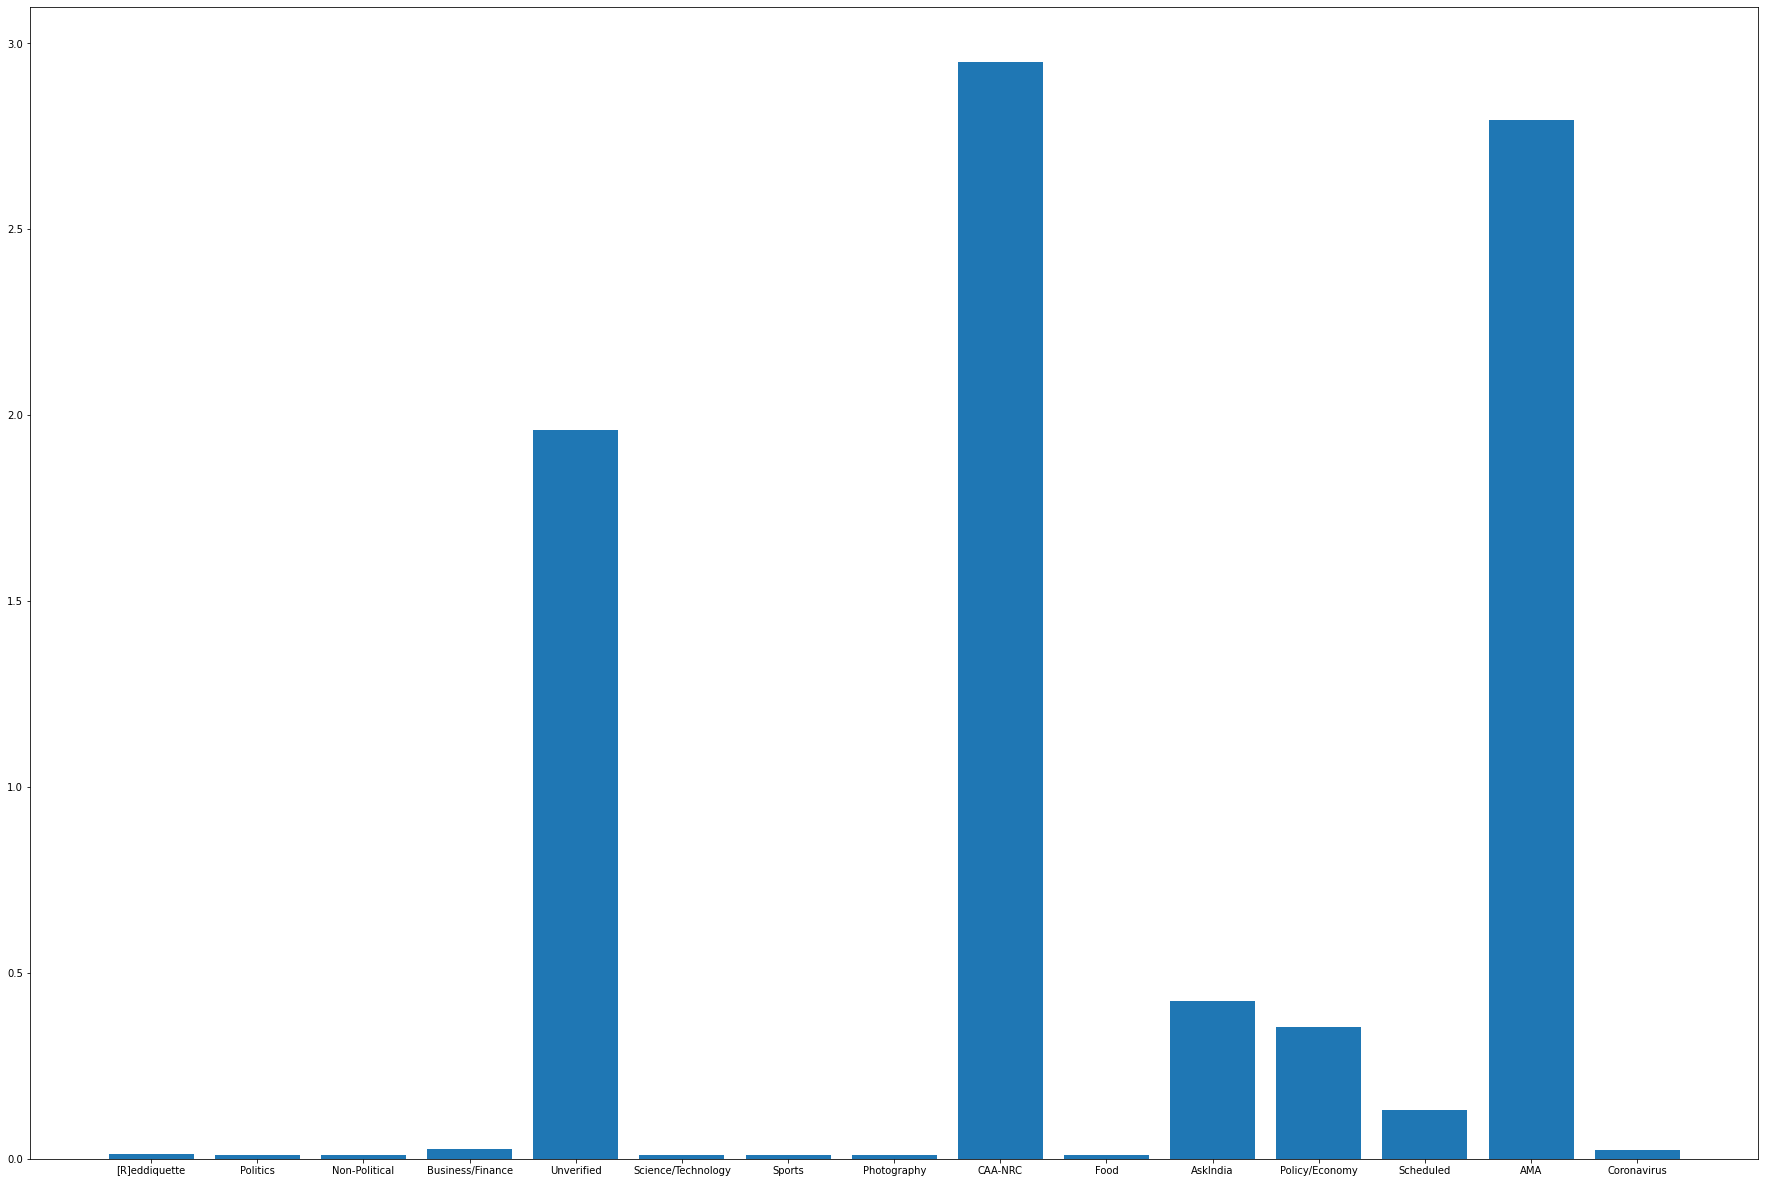

In [17]:
# Bar Graph for Length of Body Vs Flairs
fig = plt.figure()
ax = fig.add_axes([0,0,4,4])
cnt = [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
i=0
for f in flairs:
    arr = df.loc[df['flair'] == f, 'body']
    for ele in arr:
        cnt[i] = cnt[i] + len(str(ele).split(','))
        cnt[i] = cnt[i]/100
    i = i+1 
ax.bar(flairs,cnt)